In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else(x))

In [5]:
df.columns


Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [ ]:
df[['job_title_short' ,'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [10]:
df_exploded = df.explode('job_skills')


In [12]:
df_skills = df_exploded.copy()
df_skills = df_skills.groupby(['job_title_short' ,'job_skills']).size()
df_skills

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [19]:
df_skills_count = df_skills.reset_index(name='skill_count')
df_skills_count 

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [22]:
df_skills_count.sort_values(by = "skill_count" , inplace= True , ascending=False)
df_skills_count 

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
776,Data Engineer,linode,1
1843,Senior Data Scientist,delphi,1
1888,Senior Data Scientist,kali,1
1289,Machine Learning Engineer,powerbi,1


In [23]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


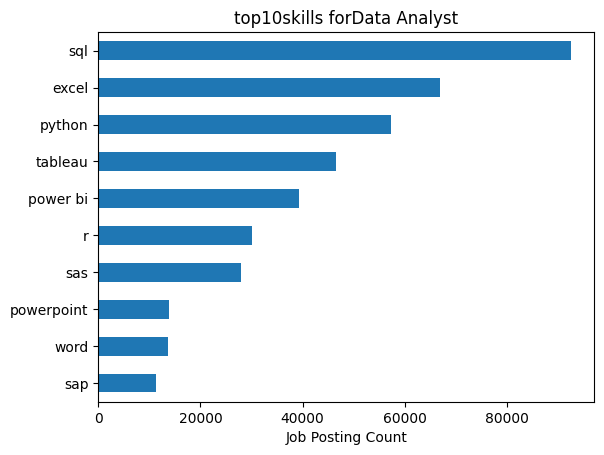

: 

In [ ]:
df_skill_final.plot(kind="barh" , x='job_skills',y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'top{head_value}skills for{job_title}')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.show()
